In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Problem 1 : Exploratory Analysis

In [2]:
# Read csv into dataframe
quizData = pd.read_csv('quizData.csv')
df = pd.DataFrame(quizData)
df

,Variance,Skewness,Kurtosis,Entropy,Banknote
0,3.62160,8.6661,-2.80730,-0.44699,Genuine
1,4.54590,8.1674,-2.45860,-1.46210,Genuine
2,3.86600,-2.6383,1.92420,0.10645,Genuine
3,3.45660,9.5228,-4.01120,-3.59440,Genuine
4,0.32924,-4.4552,4.57180,-0.98880,Genuine
...,...,...,...,...,...
995,-1.89740,3.5074,-1.78420,-3.84910,Forged
996,-0.62043,0.5587,-0.38587,-0.66423,Forged
997,-1.83870,-6.3010,5.65060,0.19567,Forged
998,-3.00000,-9.1566,9.57660,-0.73018,Forged


## 1a) Print the statistical description of the predictor variables in the data and plot standard statistical distributions for each of the predictor variables. The predictors Variance, Skewness, Kurtosis, Entropy are all “numeric”.

In [3]:
# Print statistical description of features
df.describe()

,Variance,Skewness,Kurtosis,Entropy
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.170628,1.724250,1.452808,-1.224837
std,2.820315,5.938027,4.462049,2.108555
min,-7.042100,-13.773100,-5.261300,-8.548200
25%,-1.941250,-1.916200,-1.674350,-2.532775
50%,0.119660,2.140700,0.561365,-0.620265
75%,2.460275,6.573575,3.444400,0.376710
max,6.563300,12.951600,17.927400,2.449500


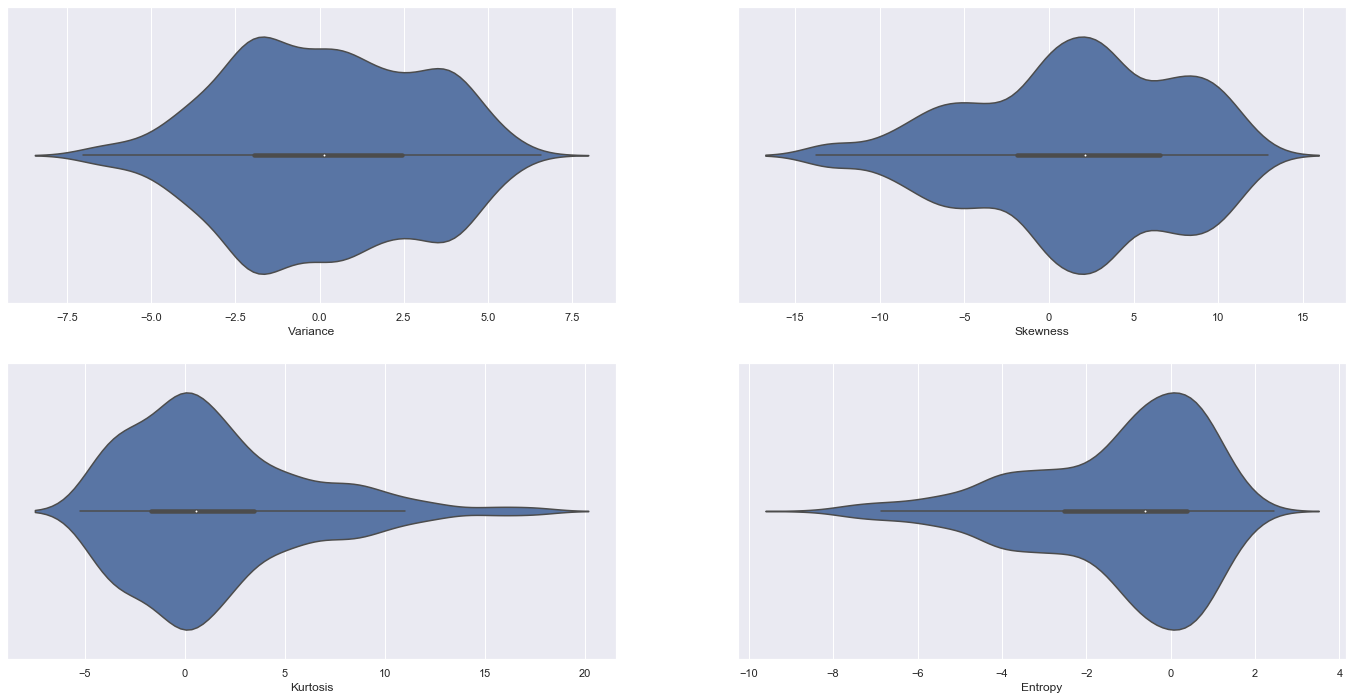

In [4]:
# Plot violin plot of features
f, axes = plt.subplots(2, 2, figsize=(24, 12))
sb.violinplot(df['Variance'], ax = axes[0,0])
sb.violinplot(df['Skewness'], ax = axes[0,1])
sb.violinplot(df['Kurtosis'], ax = axes[1,0])
sb.violinplot(df['Entropy'], ax = axes[1,1])

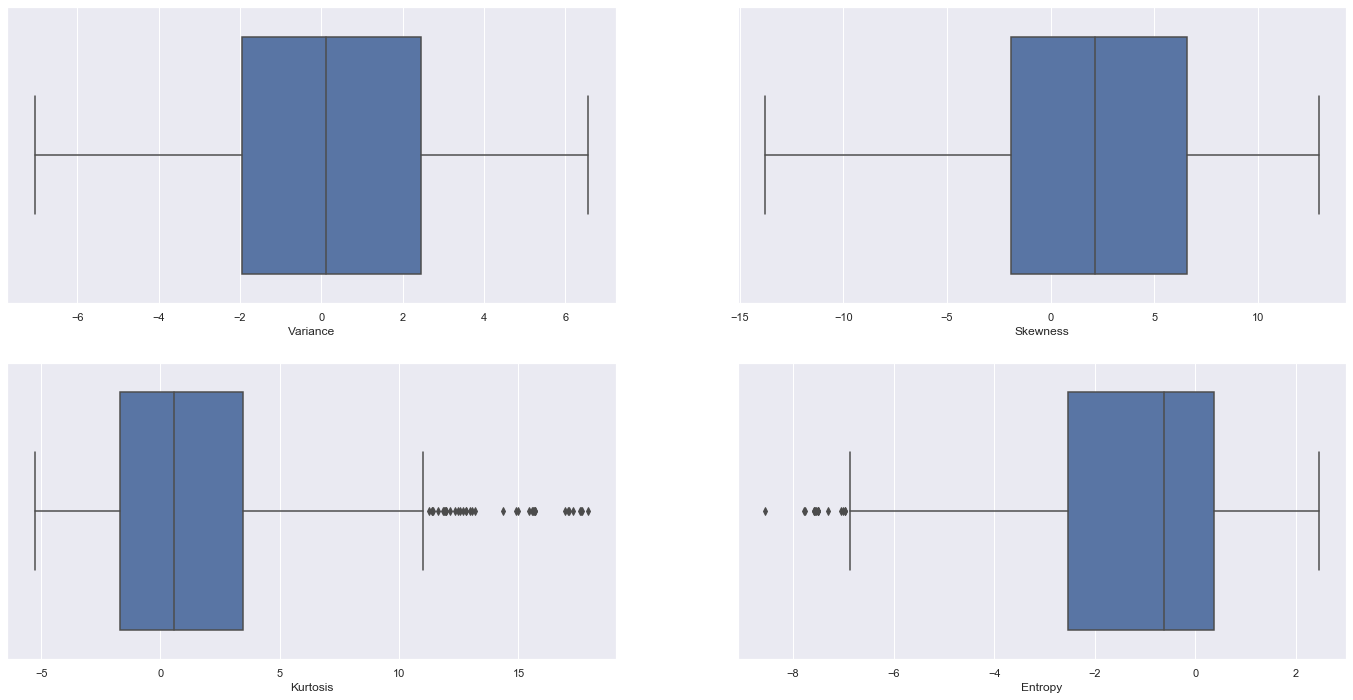

In [5]:
# Plot box plot of features
f, axes = plt.subplots(2, 2, figsize=(24, 12))
sb.boxplot(df['Variance'], ax = axes[0,0])
sb.boxplot(df['Skewness'], ax = axes[0,1])
sb.boxplot(df['Kurtosis'], ax = axes[1,0])
sb.boxplot(df['Entropy'], ax = axes[1,1])

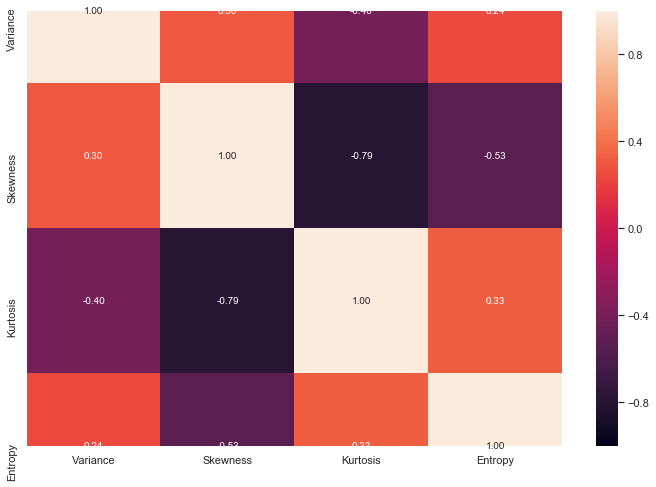

In [6]:
# Plot correlation heatmap
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

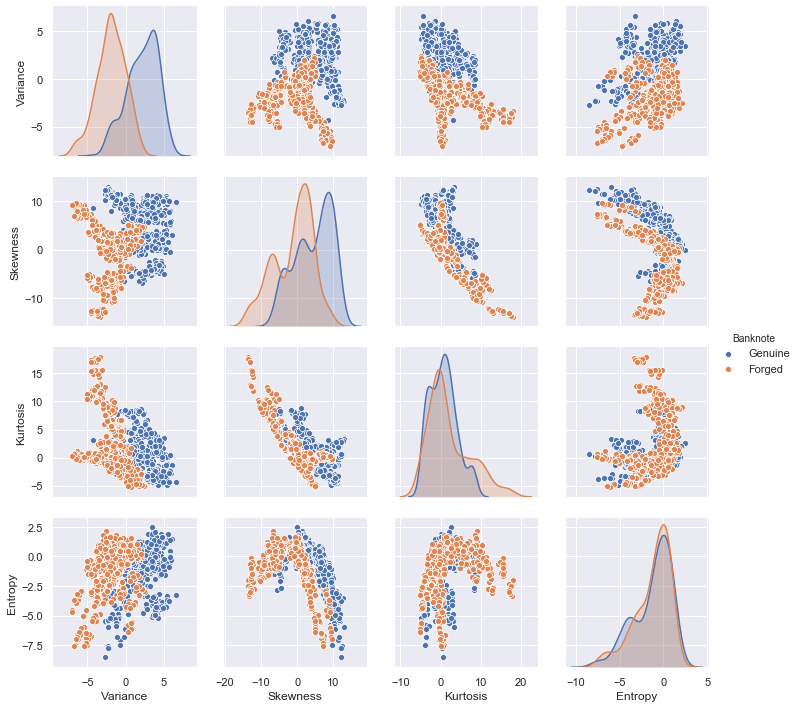

In [7]:
# Plot scatterplot matrix
sb.pairplot(df, hue="Banknote")

## 1b) Comment : Which numeric variable has the most number of outliers? Exactly how many outliers does this variable have, if we consider the points outside the range [Q1 – 1.5 * (Q3 – Q1), Q3 + 1.5 * (Q3 – Q1)] to be the outliers?

In [8]:
# Visually, kurtosis has the most number of outliers

# Identify outlier threshold values
upper_pctl = np.percentile(df['Kurtosis'], 75)
lower_pctl = np.percentile(df['Kurtosis'], 25)
IQR = upper_pctl - lower_pctl
lower_outlier = lower_pctl - 1.5* IQR
upper_outlier = upper_pctl + 1.5* IQR

# Apply conditional and count length of resulting dataframe
outlier_count = df['Kurtosis'][(df['Kurtosis'] < lower_outlier) | (df['Kurtosis'] > upper_outlier)].count()
print(outlier_count)

# Hence kurtosis has the highest numebr of outliers at 37

37


## 1c) Print the statistical description and plot standard statistical distributions for the response variable – Banknote.

In [9]:
# Statistical description for categorical feature "Banknote"
df["Banknote"].value_counts()

Genuine    500
Forged     500
Name: Banknote, dtype: int64

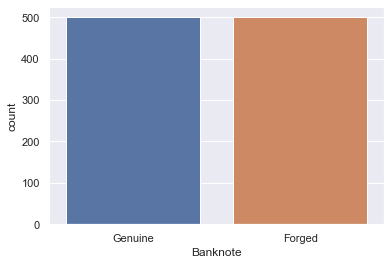

In [10]:
# Plot count plot for feature "Banknote"
sb.countplot(df["Banknote"])

## 1d)Write a small piece of code to print the exact ratio (“Genuine” : “Forged”) in the response variable Banknote

In [11]:
# Count genuine and forged occurences
genuine_count = df['Banknote'][(df['Banknote'] == "Genuine")].count()
forged_count = df['Banknote'][(df['Banknote'] == "Forged")].count()

# Calculate ratio
genfor_ratio = genuine_count / forged_count
print(genfor_ratio)

1.0


## 1e) Visualize the relationship of response variable Banknote with the numeric predictor variables using swarmplots

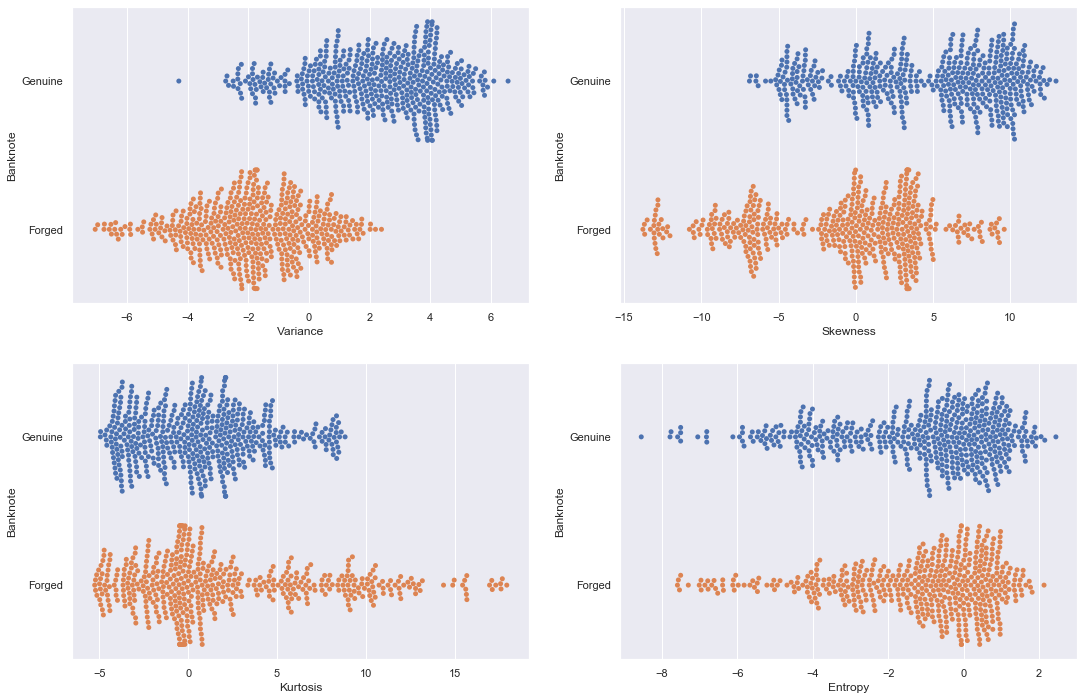

In [12]:
# Plot respective swarmplots of features against "Banknote"
f, axes = plt.subplots(2, 2, figsize=(18, 12))
sb.swarmplot(x = "Variance", y = "Banknote", data = df, orient = "h", ax = axes[0,0])
sb.swarmplot(x = "Skewness", y = "Banknote", data = df, orient = "h", ax = axes[0,1])
sb.swarmplot(x = "Kurtosis", y = "Banknote", data = df, orient = "h", ax = axes[1,0])
sb.swarmplot(x = "Entropy", y = "Banknote", data = df, orient = "h", ax = axes[1,1])

# Problem 2 : Uni-Variate Decision Tree

## 2a) Partition the data randomly into Train and Test sets; 80% for Train and 20% for Test. On the Train set, fit four uni-variate Decision Tree models for Banknote against each of the four numeric predictor variables – Variance, Skewness, Kurtosis, Entropy. In each case, do not fit a decision tree more than depth 4 (may overfit otherwise).

In [13]:
# Seperate df into features and labels
y = df["Banknote"]
X = df.drop(["Banknote"], axis=1)

# Split the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
# Create function for tree model
from sklearn.tree import DecisionTreeClassifier
def train_tree(feature):
    dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
    X_temp = X_train[feature].values.reshape(-1,1)
    return dectree.fit(X_temp, y_train) 


# Train 4 univariate tree models
model_variance = train_tree("Variance")
model_skewness = train_tree("Skewness")
model_kurtosis = train_tree("Kurtosis")
model_entropy = train_tree("Entropy")

## 2b) Predict Banknote using each of the four models on both Train and Test data. Show the Confusion Matrix for each model, both for Train and Test datasets. Print the Classification Accuracy for the tree models, on both datasets.

In [15]:
# Create function for prediction result summary
from sklearn.metrics import confusion_matrix

# Label negative and positive on confusion matrix as Genuine and Forged
labels = ['Forged', 'Genuine']

# Code extracted from M4 Classicication tree example class notebook
def predict_tree(model, feature):
    # Reshape X features
    X_temp_train = X_train[feature].values.reshape(-1,1)
    X_temp_test = X_test[feature].values.reshape(-1,1)
    
    y_train_pred = model.predict(X_temp_train)
    y_test_pred = model.predict(X_temp_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", model.score(X_temp_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", model.score(X_temp_test, y_test))
    print()
    
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_test_pred))

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred, labels),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred, labels), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.87125

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.86

              precision    recall  f1-score   support

      Forged       0.83      0.90      0.86        99
     Genuine       0.89      0.82      0.86       101

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



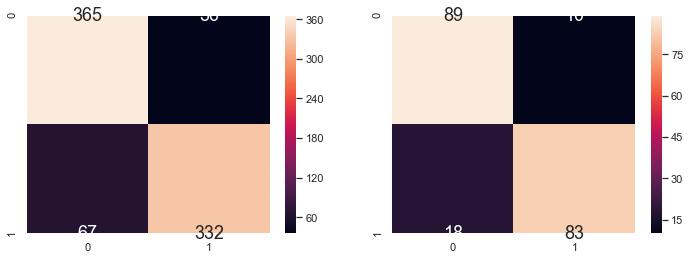

In [16]:
# Predict on model_variance
predict_tree(model_variance, "Variance")

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.79

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.78

              precision    recall  f1-score   support

      Forged       0.72      0.90      0.80        99
     Genuine       0.87      0.66      0.75       101

    accuracy                           0.78       200
   macro avg       0.80      0.78      0.78       200
weighted avg       0.80      0.78      0.78       200



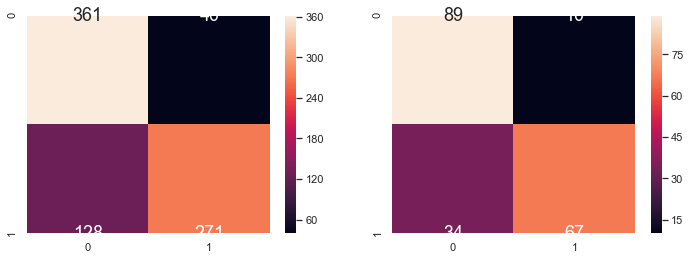

In [17]:
# Predict on model_skewness
predict_tree(model_skewness, "Skewness")

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.645

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.605

              precision    recall  f1-score   support

      Forged       0.61      0.57      0.59        99
     Genuine       0.60      0.64      0.62       101

    accuracy                           0.60       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.61      0.60      0.60       200



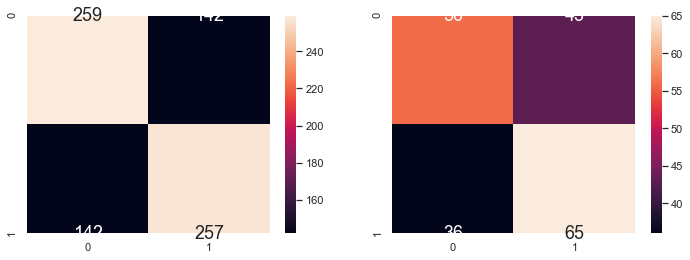

In [18]:
# Predict on model_kurtosis
predict_tree(model_kurtosis, "Kurtosis")

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.575

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.515

              precision    recall  f1-score   support

      Forged       0.51      0.85      0.63        99
     Genuine       0.56      0.19      0.28       101

    accuracy                           0.52       200
   macro avg       0.53      0.52      0.46       200
weighted avg       0.53      0.52      0.46       200



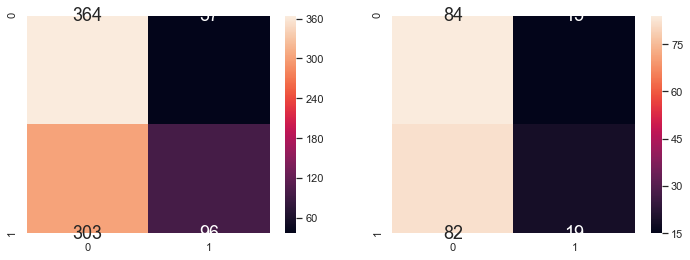

In [19]:
# Predict on model_entropy
predict_tree(model_entropy, "Entropy")

## 2c) Comment : Which of the four uni-variate Decision Trees is the best in terms of predicting Banknote? Justify.

In [20]:
# For a holistic answer, we should look at f1-scores in addition to classification accuracies> This is because distributions
# will most likely be skewed upon random train test splits. The unbalanced nature of the train set may trick the model into
# guessing the majority class which is inaccurate and undesirable.

# For simplicity of calculation, I will take the average F1 score of both classes for all 4 models.
# model_variance: average f1 = 0.825, test accuracy = 0.825
# model_skewness: average f1 = 0.730, test accuracy = 0.735
# model_Kurtosis: average f1 = 0.625, test accuracy = 0.635
# model_variance: average f1 = 0.425, test accuracy = 0.435

# Conclusion: Since model_variance has the best accuracy and f1 score, it is the best univariate model for predicting Banknote

# Problem 3 : Multi-Variate Decision Tree

## 3a) Partition the data randomly into Train and Test sets; 80% for Train and 20% for Test (you may use the same partition as before, if you want). On the Train set, fit a single multi-variate Decision Tree model (max depth 4) for Banknote against all of the four other numeric predictor variables – Variance, Skewness, Kurtosis, Entropy.

In [21]:
# Use previous trian test split and generate multivariate tree model
dectree = DecisionTreeClassifier(max_depth = 4)
multi_model = dectree.fit(X_train, y_train) 

## 3b) Predict Banknote using the tree model you fit on both Train and Test data. Show the Confusion Matrix on both Train and Test datasets. Print the Classification Accuracy for the tree model on both Train and Test datasets.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.97

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.92

              precision    recall  f1-score   support

      Forged       0.89      0.96      0.92        99
     Genuine       0.96      0.88      0.92       101

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



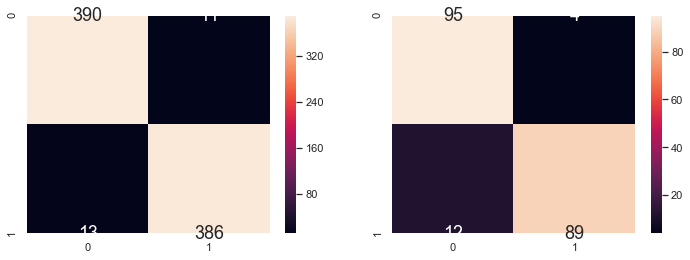

In [22]:
# Predict from train and test usiong model
y_train_pred = multi_model.predict(X_train)
y_test_pred = multi_model.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", multi_model.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", multi_model.score(X_test, y_test))
print()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred, labels=labels),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=labels), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



## 3c) Write a small piece of code to print the exact FPR and FNR values calculated from each of the confusion matrices. You may consider “Genuine” as Positive and “Forged” as Negative in this context and calculate accordingly.

In [23]:
# Obtain relevant cm values
con_matrix = confusion_matrix(y_train, y_train_pred)

# Note that we labelled 0,1 as forged and genuine previously, in line with the requirement that genuine=positive and forged=negative
TN = con_matrix[0,0]
TP = con_matrix[1,1]
FP = con_matrix[0,1]
FN = con_matrix[1,0]


FPR = FP / (FP+TN)
FNR = FN / (FN+TP)
print("False Positive Rate \t:", FPR)
print("False Negative Rate \t:", FNR)

False Positive Rate 	: 0.02743142144638404
False Negative Rate 	: 0.03258145363408521


## 3d) Print ONLY the False Positive cases (complete rows from the dataframe) in each of the Train and Test datasets. Print ONLY the False Negative cases (complete rows from the dataframe) in each of the Train and Test datasets.

In [24]:
# Form new dataframes from train and test data
data_train = pd.DataFrame(X_train)
data_test = pd.DataFrame(X_test)

# Convert predictions into dataframes
y_train_pred_df = pd.DataFrame({'label': y_train_pred[:]})
y_test_pred_df = pd.DataFrame({'label': y_test_pred[:]})

# Concat y and labels onto new dataframes
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

data_train = pd.concat([data_train, y_train], sort =False, axis=1)
data_train = pd.concat([data_train, y_train_pred_df], sort =False, axis=1)
data_test = pd.concat([data_test, y_test], sort =False, axis=1)
data_test = pd.concat([data_test, y_test_pred_df], sort =False, axis=1)


In [25]:
# Create new dataframes
fp_train_df = pd.DataFrame()
fn_train_df = pd.DataFrame()
fp_test_df = pd.DataFrame()
fn_test_df = pd.DataFrame()

# Function to identify fp
def classify_fp(df, target_df):
    count = 0 
    for index, row in df.iterrows():
        if ((row["Banknote"] == "Forged") and (row["label"] == "Genuine")):
            count+=1
            target_df = target_df.append(pd.DataFrame([row]))
    return count,target_df

# Function to identify fn
def classify_fn(df, target_df):
    count = 0 
    for index, row in df.iterrows():
        if ((row["Banknote"] == "Genuine") and (row["label"] == "Forged")):
            count+=1
            target_df = target_df.append(pd.DataFrame([row]))
    return count,target_df       

In [26]:
# False Positives in train set
fp_train, fp_train_df = classify_fp(data_train, fp_train_df)
print("False Positives in train set:")
print("FP count from confusion matrix \t:", FP)
print("FP count from function \t:", fp_train)
fp_train_df

False Positives in train set:
FP count from confusion matrix 	: 11
FP count from function 	: 11


,Variance,Skewness,Kurtosis,Entropy,Banknote,label
89,0.74428,-3.77230,1.613100,1.57540,Forged,Genuine
200,0.34340,0.12415,-0.287330,0.14654,Forged,Genuine
284,2.01770,1.79820,-2.958100,0.20990,Forged,Genuine
297,0.50225,0.65388,-1.179300,0.39998,Forged,Genuine
480,0.42830,-0.94981,-1.073100,0.32110,Forged,Genuine
567,0.75896,0.29176,-1.650600,0.83834,Forged,Genuine
602,0.37637,-0.82358,0.785430,0.74524,Forged,Genuine
603,0.55298,-3.46190,1.704800,1.10080,Forged,Genuine
672,0.39012,-0.14279,-0.031994,0.35084,Forged,Genuine
719,0.51800,0.25865,-0.840850,0.96118,Forged,Genuine


In [27]:
# False Negatives in train set
fn_train, fn_train_df = classify_fn(data_train, fn_train_df)
print("False Negatives in train set:")
print("FN count from confusion matrix \t:", FN)
print("FN count from function \t:", fn_train)
fn_train_df

False Negatives in train set:
FN count from confusion matrix 	: 13
FN count from function 	: 13


,Variance,Skewness,Kurtosis,Entropy,Banknote,label
36,-1.85840,7.8860,-1.66430,-1.83840,Genuine,Forged
128,0.77445,9.0552,-2.40890,-1.38840,Genuine,Forged
146,-0.36038,4.1158,3.11430,-0.37199,Genuine,Forged
172,0.17346,7.8695,0.26876,-3.78830,Genuine,Forged
173,-0.39816,5.9781,1.39120,-1.16210,Genuine,Forged
245,1.22470,8.7779,-2.21350,-0.80647,Genuine,Forged
283,0.24835,7.6439,0.98850,-0.87371,Genuine,Forged
301,-0.16108,-6.4624,8.35730,-1.52160,Genuine,Forged
573,0.89566,7.7763,-2.74730,-1.93530,Genuine,Forged
578,1.02350,6.9010,-2.00620,-2.71250,Genuine,Forged


In [28]:
# False Positives in test set
fp_test, fp_test_df = classify_fp(data_test, fp_test_df)
print("False Positives in test set:")
print("FP count from function \t:", fp_test)
fp_test_df

False Positives in test set:
FP count from function 	: 4


,Variance,Skewness,Kurtosis,Entropy,Banknote,label
63,0.31803,-0.99326,1.0947,0.886190,Forged,Genuine
76,1.59040,2.21210,-3.1183,-0.117250,Forged,Genuine
116,1.56310,0.89599,-1.9702,0.654720,Forged,Genuine
155,2.03100,1.85200,-3.0121,0.003003,Forged,Genuine


In [29]:
# False Negatives in test set
fn_test, fn_test_df = classify_fn(data_test, fn_test_df)
print("False Negatives in test set:")
print("FN count from function \t:", fn_test)
fn_test_df

False Negatives in test set:
FN count from function 	: 12


,Variance,Skewness,Kurtosis,Entropy,Banknote,label
65,0.117390,6.27610,-1.5495,-2.47460,Genuine,Forged
73,-1.858400,7.88600,-1.6643,-1.83840,Genuine,Forged
74,-0.248110,-0.17797,4.9068,0.15429,Genuine,Forged
80,-0.167350,7.62740,1.2061,-3.62410,Genuine,Forged
95,1.480600,7.63770,-2.7876,-1.03410,Genuine,Forged
101,0.147830,7.94600,1.0742,-3.34090,Genuine,Forged
119,-0.062025,6.19750,1.0990,-1.13100,Genuine,Forged
138,-1.858400,7.88600,-1.6643,-1.83840,Genuine,Forged
147,0.051979,7.05210,-2.0541,-3.15080,Genuine,Forged
168,-0.216610,8.03290,1.8848,-3.88530,Genuine,Forged


## 3e) Predict the category of bank note (Genuine/Forged) for the following data points using the tree model you fit.

In [30]:
# Convert list of dictionaries into dataframe
test_data = [{'Variance': -4.9447, 'Skewness': 3.3005, 'Kurtosis': 1.063, 'Entropy': -1.444},
{'Variance': 0.94225, 'Skewness': 5.8561, 'Kurtosis': 1.8762, 'Entropy': -0.32544},
{'Variance': 2.2429, 'Skewness': -4.1427, 'Kurtosis': 5.2333, 'Entropy': -0.40173},
{'Variance': 0.53936, 'Skewness': 3.8944, 'Kurtosis': -4.8166, 'Entropy': -4.3418},
{'Variance': -2.5724, 'Skewness': -0.95602, 'Kurtosis': 2.7073, 'Entropy': -0.16639}]
quiz_df = pd.DataFrame.from_dict(test_data)
quiz_df

,Variance,Skewness,Kurtosis,Entropy
0,-4.94470,3.30050,1.0630,-1.44400
1,0.94225,5.85610,1.8762,-0.32544
2,2.24290,-4.14270,5.2333,-0.40173
3,0.53936,3.89440,-4.8166,-4.34180
4,-2.57240,-0.95602,2.7073,-0.16639


In [31]:
# Predict and label
test_label = multi_model.predict(quiz_df)
quiz_df['label'] = test_label
quiz_df

,Variance,Skewness,Kurtosis,Entropy,label
0,-4.94470,3.30050,1.0630,-1.44400,Forged
1,0.94225,5.85610,1.8762,-0.32544,Genuine
2,2.24290,-4.14270,5.2333,-0.40173,Genuine
3,0.53936,3.89440,-4.8166,-4.34180,Forged
4,-2.57240,-0.95602,2.7073,-0.16639,Forged
